<a href="https://colab.research.google.com/github/SHAIMA-HAQUE/Diabetes-Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
dataset = pd.read_csv('diabetes_data_upload.csv')
print(dataset)

     Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[520 rows x 17 columns]


In [26]:
dataset['class'].value_counts()


Positive    320
Negative    200
Name: class, dtype: int64

In [27]:
dataset.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in dataset.columns[1:] :
    dataset[i] = le.fit_transform(dataset[i])

In [29]:
X = dataset.drop(['class'], axis="columns")
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [30]:
Y = dataset['class']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

NameError: ignored

In [31]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [32]:
print(X.shape, Y.shape)

(520, 16) (520,)


In [34]:
X.corrwith(Y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

In [35]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]

In [36]:
print(X_FS)

     Polyuria  Polydipsia  Age  ...  delayed healing  Alopecia  Itching
0           0           1   40  ...                1         1        1
1           0           0   58  ...                0         1        0
2           1           0   41  ...                1         1        1
3           0           0   45  ...                1         0        1
4           1           1   60  ...                1         1        1
..        ...         ...  ...  ...              ...       ...      ...
515         1           1   39  ...                1         0        1
516         1           1   48  ...                1         0        1
517         1           1   58  ...                0         0        0
518         0           0   32  ...                1         1        1
519         0           0   42  ...                0         0        0

[520 rows x 10 columns]


In [37]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_FS, Y, test_size = 0.3,random_state=12345,shuffle=True)
print(X_train.shape, X_test.shape)

(364, 10) (156, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


class,0,1
Gender,,
0,9.500000,54.060000
1,90.500000,45.940000


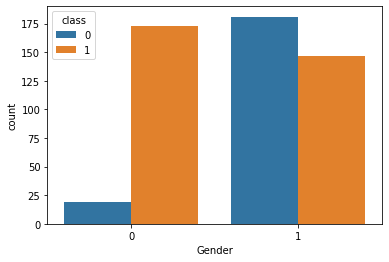

In [48]:
# Distribution of Gender
sns.countplot(dataset['Gender'],hue=dataset['class'], data=dataset)

plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

# # Distribution of Polyuria
# sns.countplot(dataset['Polyuria'],hue=dataset['class'], data=dataset)


# plot_criteria= ['Polyuria', 'class']
# cm = sns.light_palette("red", as_cmap=True)
# (round(pd.crosstab(dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

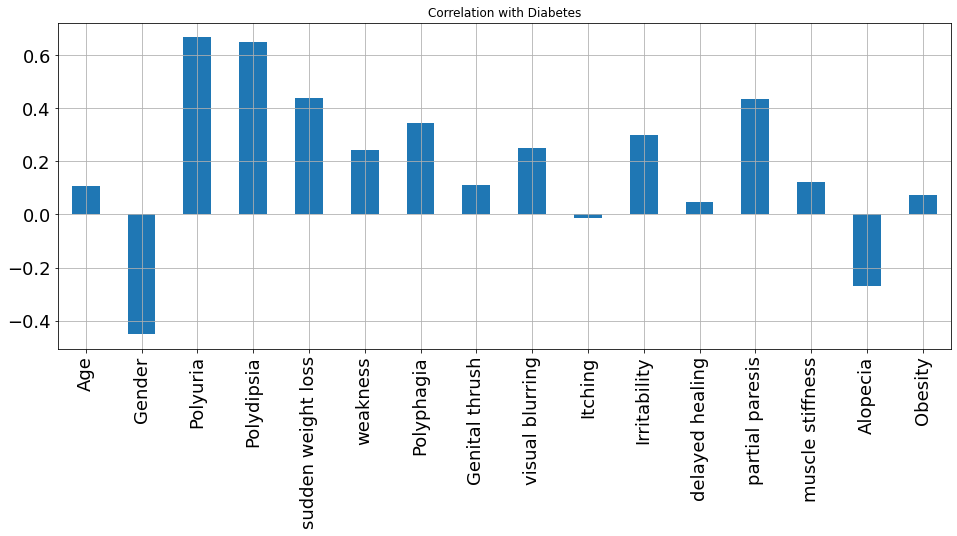

In [51]:
#Correlation with Response Variable class

X.corrwith(Y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 18,
        rot = 90, grid = True)

In [40]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state = 0, penalty = 'l2')
logReg.fit(X_train, Y_train)

Y_pred = logReg.predict(X_test)
print(Y_test, Y_pred)

148    1
190    1
445    1
52     1
183    1
      ..
73     1
310    0
384    1
60     1
22     1
Name: class, Length: 156, dtype: int64 [1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 1 1]


In [41]:
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:\n", accuracy_score(Y_test, Y_pred)) 
print("Precision:\n", precision_score(Y_test, Y_pred, average=None))
print("Recall:\n", recall_score(Y_test, Y_pred, average = None))

Confusion Matrix:
 [[45  9]
 [ 8 94]]
Accuracy:
 0.8910256410256411
Precision:
 [0.8490566  0.91262136]
Recall:
 [0.83333333 0.92156863]


In [42]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn))
print("Accuracy:\n", accuracy_score(Y_test, Y_pred_knn)) 

Confusion Matrix:
 [[51  3]
 [20 82]]
Accuracy:
 0.8525641025641025


In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dtc = dtc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dtc))
print("Accuracy:\n", accuracy_score(Y_test, Y_pred_dtc))

Confusion Matrix:
 [[52  2]
 [ 3 99]]
Accuracy:
 0.967948717948718


In [44]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

Y_pred_rfc = rfc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rfc))
print("Accuracy:\n", accuracy_score(Y_test, Y_pred_rfc))

Confusion Matrix:
 [[ 54   0]
 [  2 100]]
Accuracy:
 0.9871794871794872
